In [54]:
from sklearn.datasets import fetch_mldata

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [86]:
### Loading original mnist dataset from sklearn
mnist = fetch_mldata("MNIST original")
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [57]:
## loading the data
x = mnist.data

In [87]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [88]:
## loading the target
y = mnist.target
y = y.astype(int)
x.shape
print (y)

[0 0 0 ..., 9 9 9]


In [83]:
### Choosing every 10 element from the data and storing it in X and Y
import numpy as np
X = x[::10,:]
Y = y[::10] 

In [80]:
## Applying PCA 
pca = PCA(n_components=0.80)
pca.fit(X)
X = pca.transform(X)
X.shape, Y.shape

((7000, 20), (7000,))

In [61]:
## after every epoch storing the accuracy 
results = []
for epoch in range(10):
    for j in range(2):
        x_tr,x_ts,y_tr,y_ts=train_test_split(X,Y,test_size=0.2)
        n = KNeighborsClassifier(n_neighbors=8)
        n.fit(x_tr, y_tr)
        y_pred = n.predict(x_ts) # test accuracy because predicting using xtest if you want to calculate train accuracy then predict using xtrain
    results.append(metrics.accuracy_score(y_ts, y_pred)*100)
    print(" KNN model accuracy(in %):", round(metrics.accuracy_score(y_ts, y_pred)*100, 3))
print("averaged accuracy",round(sum(results)/len(results),3))

 KNN model accuracy(in %): 94.143
 KNN model accuracy(in %): 93.857
 KNN model accuracy(in %): 94.571
 KNN model accuracy(in %): 93.571
 KNN model accuracy(in %): 94.429
 KNN model accuracy(in %): 94.0
 KNN model accuracy(in %): 93.857
 KNN model accuracy(in %): 94.071
 KNN model accuracy(in %): 93.786
 KNN model accuracy(in %): 93.286
averaged accuracy 93.957


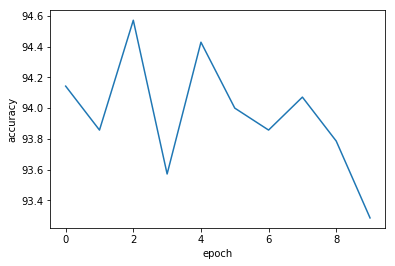

In [62]:
### Plotting the epoch vs accuracy
import matplotlib.pyplot as plt
plt.plot(results)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [70]:
### Applying Randomforest
results = []
for epoch in range(10):
    for j in range(2):
        x_tr,x_ts,y_tr,y_ts=train_test_split(X,Y,test_size=0.2)
        r = RandomForestClassifier(n_jobs=2, random_state=0)
        r.fit(x_tr, y_tr)
        y_pred = r.predict(x_ts)
    results.append(metrics.accuracy_score(y_ts, y_pred)*100)
    print(" random forest accuracy(in %):", round(metrics.accuracy_score(y_ts, y_pred)*100, 3))
print("averaged accuracy",round(sum(results)/len(results),3))

 random forest accuracy(in %): 85.571
 random forest accuracy(in %): 86.929
 random forest accuracy(in %): 86.357
 random forest accuracy(in %): 84.714
 random forest accuracy(in %): 86.357
 random forest accuracy(in %): 85.571
 random forest accuracy(in %): 84.714
 random forest accuracy(in %): 83.571
 random forest accuracy(in %): 86.357
 random forest accuracy(in %): 85.5
averaged accuracy 85.564


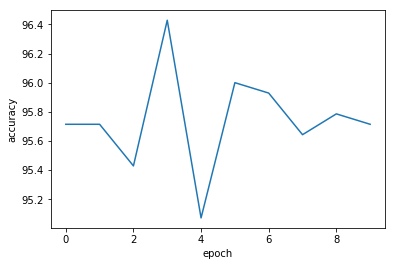

In [75]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [72]:
results = []
for epoch in range(10):
    for j in range(2):
        x_tr,x_ts,y_tr,y_ts=train_test_split(X,Y,test_size=0.2)
        svc = svm.SVC(kernel='poly', C=1)
        svc.fit(x_tr, y_tr)
        y_pred = svc.predict(x_ts)
    results.append(metrics.accuracy_score(y_ts, y_pred)*100)
    print(" svm accuracy(in %):", round(metrics.accuracy_score(y_ts, y_pred)*100, 3))
print("averaged accuracy",round(sum(results)/len(results),3))

 svm accuracy(in %): 95.714
 svm accuracy(in %): 95.714
 svm accuracy(in %): 95.429
 svm accuracy(in %): 96.429
 svm accuracy(in %): 95.071
 svm accuracy(in %): 96.0
 svm accuracy(in %): 95.929
 svm accuracy(in %): 95.643
 svm accuracy(in %): 95.786
 svm accuracy(in %): 95.714
averaged accuracy 95.743


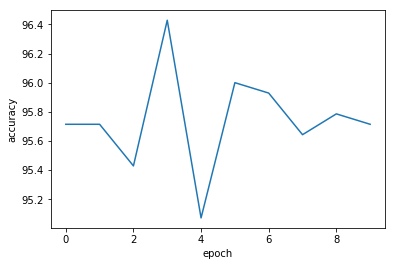

In [73]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()